In [32]:
import json
from pprint import pprint
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request, json 

In [33]:
data = None
with urllib.request.urlopen("https://gitlab.com/rajacsp/datasets/raw/master/trump.json") as url:
    data = json.loads(url.read().decode())

In [34]:
data['tweets'][0]

{'created_at': 'Mon Jan 01 13:37:52 +0000 2018',
 'favorite_count': 54056,
 'id_str': '947824196909961216',
 'in_reply_to_user_id_str': None,
 'is_retweet': False,
 'retweet_count': 8656,
 'source': 'Twitter for iPhone',
 'text': 'Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!'}

In [35]:
tweet_index = []
tweet_date = []
positive_tweets = []
negative_tweets = []

In [36]:
tw_counter = 0
def analyze_local(sentence, tw_date):
    sid = SentimentIntensityAnalyzer()
    
    #print(sentence)
    global tw_counter
    tw_counter += 1
    ss = sid.polarity_scores(sentence)
    #print(ss['pos'])
    positive_tweets.append(ss['pos'])
    negative_tweets.append(-ss['neg'])    
    tweet_index.append(tw_counter)
    current_date = pd.to_datetime(tw_date).date()
    #print(current_date)
    tweet_date.append(current_date)
    '''
    for k in sorted(ss):
        #print(ss)
        print('{0}: {1}, '.format(k, ss[k]), end = '')
    '''

In [37]:
def plot_data():
    # evenly sampled time at 200ms intervals
    
    
    #myneglist = [ -x for x in negative_tweets]

    # red dashes, blue squares and green triangles
    plt.title('Trump Tweet Sentiment Analysis : Positive (blue) and Negative (red)')
    plt.plot(tweet_date, positive_tweets, 'b--', tweet_date, negative_tweets, 'r--')
    #plt.plot(tweet_date, negative_tweets, 'r--')
    plt.show()

In [38]:
def test_data():    
    #print(data['tweets'][0])
    total_tweets = len(data['tweets'])
    for x in range(total_tweets):
        analyze_local(data['tweets'][x]['text'], data['tweets'][x]['created_at'])
        
    plot_data() 

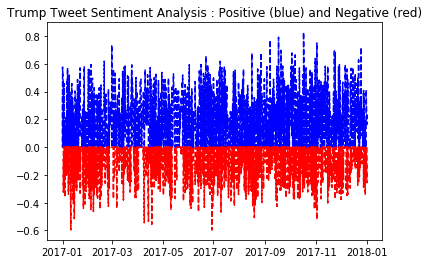

In [39]:
test_data()